### Hector Daniel Juarez Leonel
# Autoencoder
Siguiendo con la reducción de dimensión, los autoencoders sirven para reducir la dimensión de un conjunto de datos, pero tambien tiene otros usos y beneficios, como el quitar ruido en las imágenes o el generar de manera artificial muestras de datos en combinación con otros métodos. 

Los autoencoders están basados en redes neuronales, por lo que es importante el entendimiento de estas.

De manera sencilla, un autoencoder se puede ver como la concatenación de 2 redes neuronales. La primera red, dado un vector de entrada de tamaño N, da una salida de un vector de tamaño M. La segunda red, dado un vector de tamaño M, da una salida de tamaño N. Con esto, al concatenar las 2 redes y entrenando la red, se busca que la salida sea igual a la entrada.

A continuación se muestra un ejemplo que utiliza CNN para crear un Autoencoder utilizando como datos de entrenamiento el dataset de dígitos escritos a mano de MINST

# MINST Convolutional Autoencoder

En este ejemplo se utiliza la libreria de keras para la creación y entrenamiento de la red neuronal

In [1]:
#El siguiente código es una configuración que debo de poner para que pueda usar
#mi gpu en mi computadora.
import tensorflow as tf2
gpus = tf2.config.experimental.list_physical_devices('GPU')
tf2.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
#Importación de librerias para la creación de la red y tratamiento de datos
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

A continuación, se cargan los datos

In [3]:
with open('../data/mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

Ya que las imágenes tienen valores de 0-255, se hace un reescalado para que sus valores estén entre 0-1

In [4]:
images = images / 255.

En otros ejemplos, el autor tenia que hacer un cambio de forma para poder introducir las imágenes como un solo vector de entrada, en el caso de redes convolucionales esto no es necesario pues trabaja con matrices como valores de entrada, sin embargo, al ser las imágenes de 28x28 por la forma en la que trabaja la red, requiere saber la profundidad de la imágen por lo que se hace un cambio de forma a 28x28x1

In [5]:
images = images.reshape((-1, 28, 28, 1))

Define la capa de entrada la cual tiene la misma forma que las imágenes

In [6]:
input_layer = Input(shape=(28, 28, 1,))

Añade una capa convolucional con 16 filtros de tamaño 3x3 y función de activación ReLu

In [7]:
hidden_encoding = Conv2D(
    16,
    (3, 3),
    activation='relu',
    padding='same', # La salida tiene el mismo tamaño que la entrada
)(input_layer)

Añade una capa de max pooling de tamaño 2x2

In [8]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

Con la capa anterior terminaria la parte de codificación, a continuación viene la parte de decodificación, comenzando con una capa convolucional

In [9]:
hidden_decoding = Conv2D(
    16, 
    (3, 3), 
    activation='relu',
    padding='same', 
)(encoded)

Ahora, añade una capa de sobremuestreo, esta repite los valores segun el tamaño dado

In [10]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

Finalmente, añade una ultima capa de convolución, usando un solo filtro que coincide con la profundidad de la imágen original. Un dato interesante es que en la decodificación utiliza la función sigmoide, al contrario de la ReLu utilizada en la codificación.

In [11]:
decoded = Conv2D(
    8, 
    (3, 3),
    activation='sigmoid',
    padding='same',
)(upsample_decoding)

Intrucción para construir la red.

In [12]:
autoencoder = Model(input_layer, decoded)

A continuación muestra la estructura de la red

In [13]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
____________________________________________________

Compila la red y establece el valor de pérdida y el tipo de optimizador.

In [14]:
#El código del libro utilizaba como optimizador adadelta
autoencoder.compile(optimizer='adam', loss="binary_crossentropy")

Ahora, realiza el entrenamiento de la red

In [15]:
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1560
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0702
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.0674
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0660
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0647
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0643
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0641
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0638
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0636
Epoch 11/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0635
Epoch 12/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0633
Epoch 13/20
313/313 [====

Utilizando solo las capas de codificación, calcula la salida para las primeras 5 imágenes, es decir, las codifica

In [16]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

Cambia la forma de la salida del codificador para poder visualizarla.

In [17]:
encoder_output = encoder_output.reshape((-1, 14 * 14, 16))

Ahora, calcula la salida del decodificador utilizando el autoencoder y las mismas 5 imágenes

In [18]:
decoder_output = autoencoder.predict(images[:5])

Cambia la forma de la salida para que corresponda con 28x28

In [19]:
decoder_output = decoder_output.reshape((-1, 28, 28))

Recordando los pasos previos, se cambió la forma de "images" a 28x28x1, para poder mostrarla con matplotlib es necesario regresarla a su forma original de 28x28

In [20]:
images = images.reshape((-1, 28, 28))

A continuación se muestran las imágenes antes de codificarlas, despues de codificarlas y despues de decodificarlas.

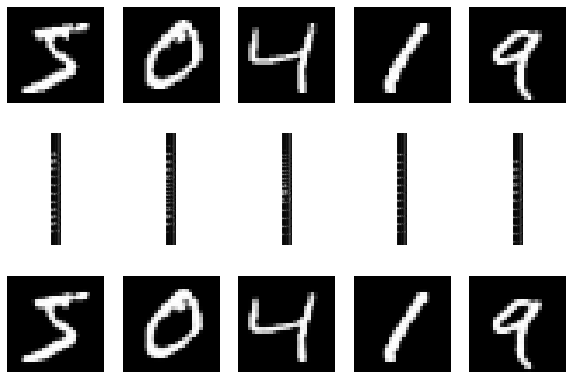

In [21]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        

# Conclusión

Al ejecutar el código del libro, el resultado era muy malo, se veia de la siguiente forma

<img src='malOptimizado.JPG' width=600 height=400>

Y la primera solución que encontré fue cambiar el tamaño del batch, ya que en el notebook original se veia que por defecto utilizaba un batch_size=1 pero al ejecutarlo yo, tomaba un valor más grande, sin embargo, al investigar un poco del tema, encontré que cambiando el optimizador podria mejorar y efectivamente así fue, el anterior optimizador era  una variante de gradiente descendente con el ratio de aprendizaje dinámico, al cambiarlo por el optimizador "adam" el cual tambien está basado en gradiente descendente con aprendizaje ratio de aprendizaje variable, pero que ocupa otros métodos para cambiar el ratio de aprendizaje, el resultado fue sorprendentemente mejor obteniendo un error mínimo.

Sobre el algoritmo en si, es muy intuitivo el funcionamiento una vez que ya se conoce de redes neuronales, lo que se busca es crear una red cuya salida sea igual a la entrada, y despues se pueden usar las capas por separado para la parte de codificación y decodificación. Desconozco que tan "seguro" podria ser el codificar un mensaje de esta forma, pero para usos como reudcción de ruido o de dimensión me parece una buena técnica.

Con respecto a la eficiencia, utilizando un optimizador correcto y con el uso de una gpu que permite el procesamiento en paralelo de tensorflow, es bastante rápido de entrenar.